# Importar las librerías necesarias

In [1]:
!pip install -r requirements_ejercicio2.txt

In [2]:
import pandas as pd
import json
from pprint import pprint

import utils  # archivo en ../src/utils.py

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Cargar los Datos desde el archivo JSON

In [3]:
data = []
with open('Dataset for Detection of Cyber-Trolls.json', 'r') as file:
  for line in file:
    data.append(json.loads(line))

df = pd.DataFrame(data)
print(df.head())

                                             content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation extras  
0  {'notes': '', 'label': ['1']}   None  
1  {'notes': '', 'label': ['1']}   None  
2  {'notes': '', 'label': ['1']}   None  
3  {'notes': '', 'label': ['1']}   None  
4  {'notes': '', 'label': ['1']}   None  


# Exploración Inicial del Conjunto de Datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  object
 2   extras      0 non-null      object
dtypes: object(3)
memory usage: 468.9+ KB


In [5]:
df.isnull().sum() # Verificar los valores nulos en el dataset

content           0
annotation        0
extras        20001
dtype: int64

In [6]:
df.describe()

,content,annotation,extras
count,20001,20001,0
unique,14640,2,0
top,#NAME?,"{'notes': '', 'label': ['0']}",NaN
freq,38,12179,NaN


La información del dataframe y las primeras filas indican que tenemos un conjunto de datos con **contenido de texto y anotaciones asociadas**, que parecen indicar **si un mensaje se considera de un troll o no** (con `'1'` posiblemente indicando un `troll`). La columna extras está completamente vacía, por lo que no contiene información útil.

#### Columnas del dataframe

- `content`: contiene el texto de los mensajes.
- `annotation`: contiene objetos JSON con notas y una lista de etiquetas, donde la etiqueta `'1'`indica un mensaje de troll.
- `extras`: es completamente nula y se puede eliminar del conjunto de datos.

Para el preprocesamiento queremos extraer la etiqueta de la columna `annotation`y convertirla a un formato más sencillo de manejar, como un entero o un booleano. Transformamos el dataset para tener una columna `label` más clara:

In [7]:
df['label'] = df['annotation'].apply(lambda x: int(x['label'][0]))
df.drop(['annotation', 'extras'], axis=1, inplace=True)

print(df.head())

                                             content  label
0                             Get fucking real dude.      1
1   She is as dirty as they come  and that crook ...      1
2   why did you fuck it up. I could do it all day...      1
3   Dude they dont finish enclosing the fucking s...      1
4   WTF are you talking about Men? No men thats n...      1


El código anterior transforma la columna `annotation` en una nueva columna `label` con valores enteros y luego elimina las columnas originales `annotation` y `extras`.

# Guardar el DataFrame en un archivo JSON simplificado

In [17]:
df.to_json('cleaned_data.json', orient='records', lines=True)

# Análisis Exploratorio de Datos (EDA)

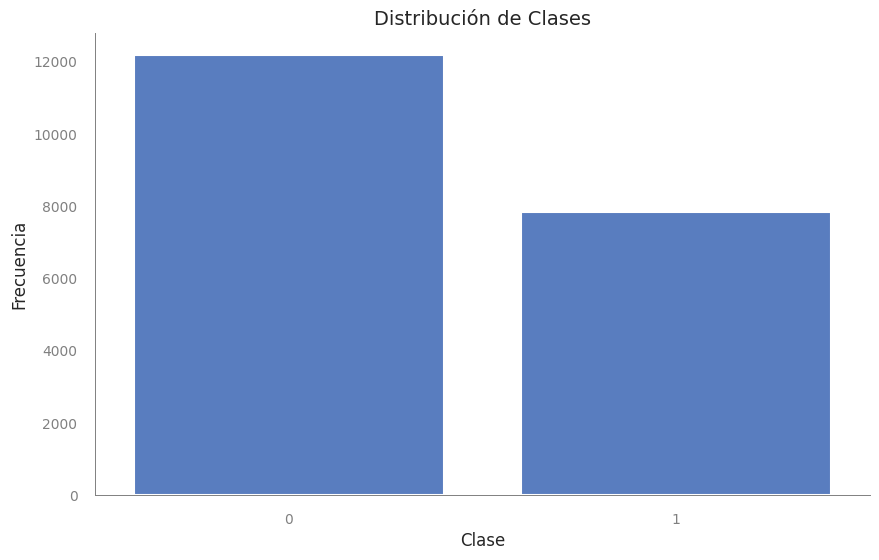

In [8]:
utils.plot_class_distribution(df, 'label')

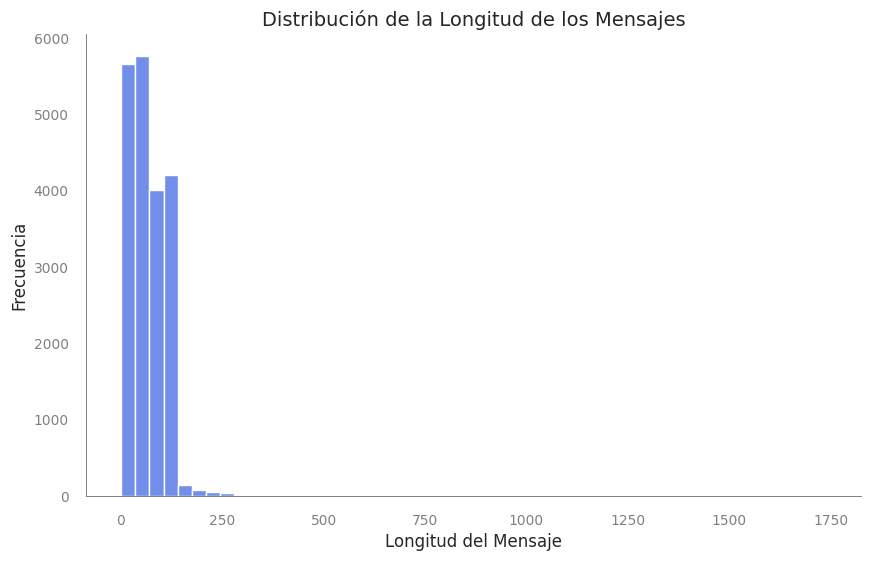

In [9]:
utils.plot_message_length(df, 'content')

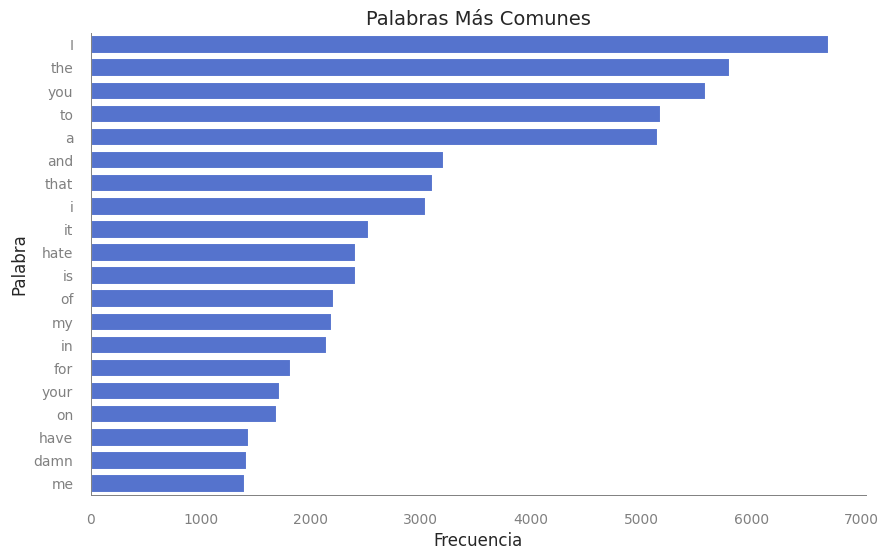

In [10]:
utils.plot_word_frequency(df, 'content')

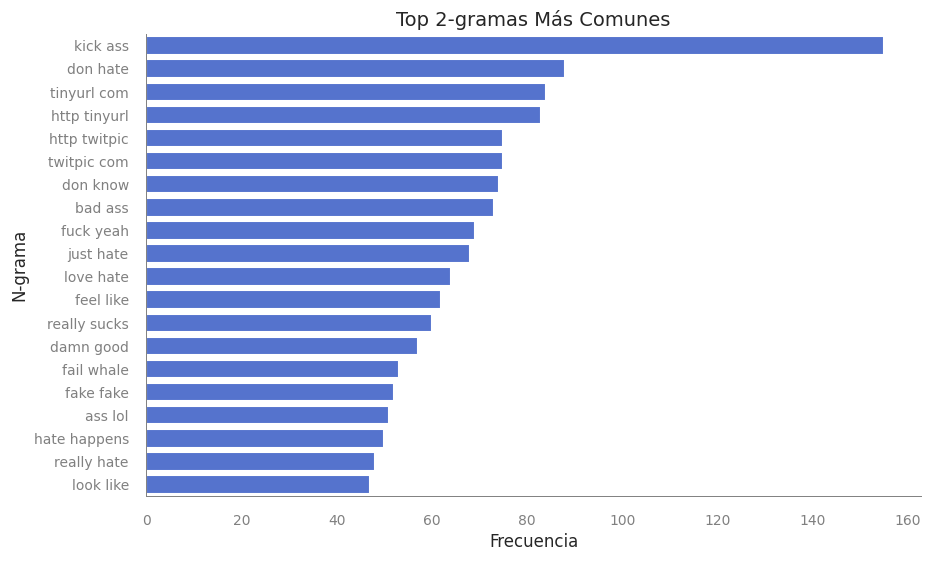

In [11]:
utils.plot_ngrams(df, 'content')

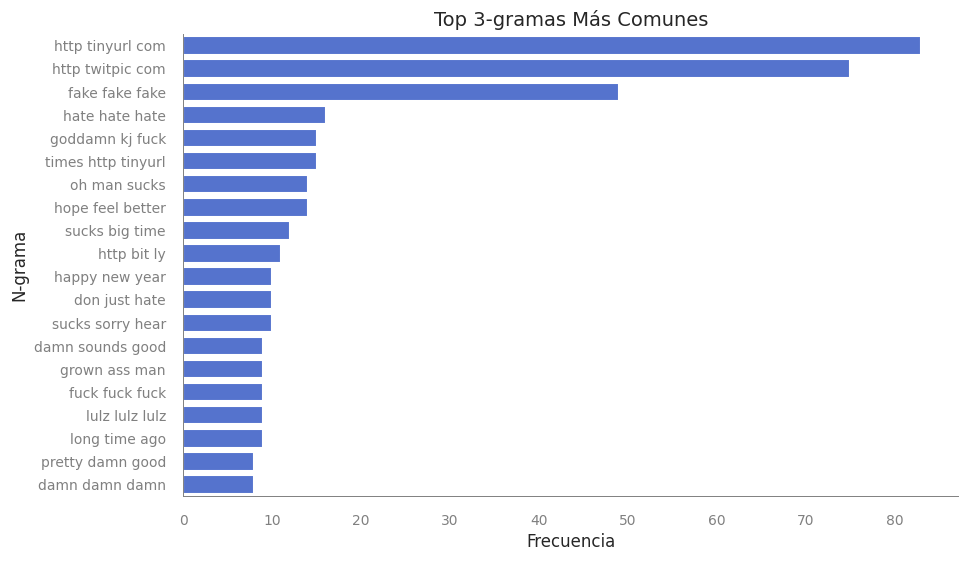

In [12]:
utils.plot_ngrams(df, 'content', n=3)

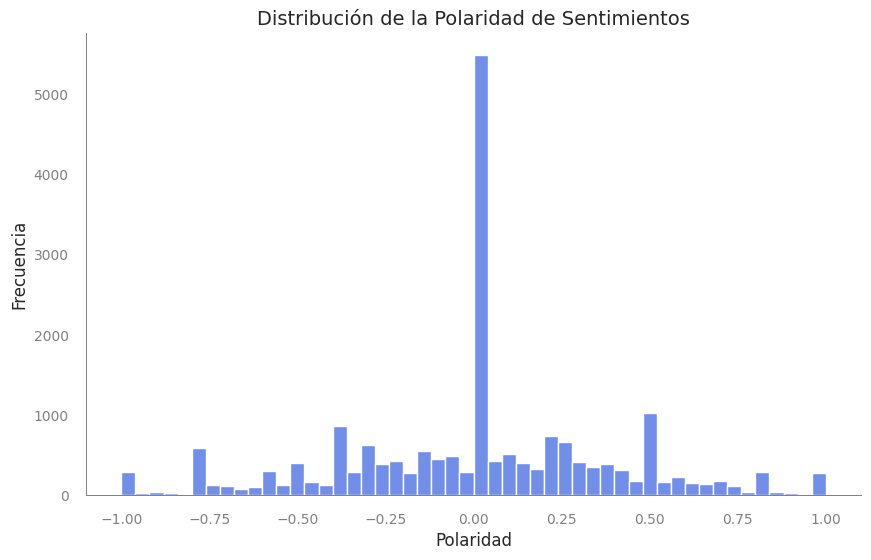

In [13]:
utils.plot_sentiment_distribution(df, 'content')

In [16]:
df['subjectivity'] = df['content'].apply(utils.calculate_subjectivity)

# Cálculo de la subjetividad media por clase
mean_subj_troll = df[df['label'] == 1]['subjectivity'].mean()
mean_subj_not_troll = df[df['label'] == 0]['subjectivity'].mean()

print(f"Subjetividad media para mensajes de trolls: {mean_subj_troll}")
print(f"Subjetividad media para mensajes que no son trolls: {mean_subj_not_troll}")

Subjetividad media para mensajes de trolls: 0.5265475218466408
Subjetividad media para mensajes que no son trolls: 0.46611025213479956


In [17]:
# Correlación entre subjetividad y ser troll
correlation = df['subjectivity'].corr(df['label'])
print(f"Correlación entre subjetividad y la etiqueta de troll: {correlation}")

Correlación entre subjetividad y la etiqueta de troll: 0.08780892043574677


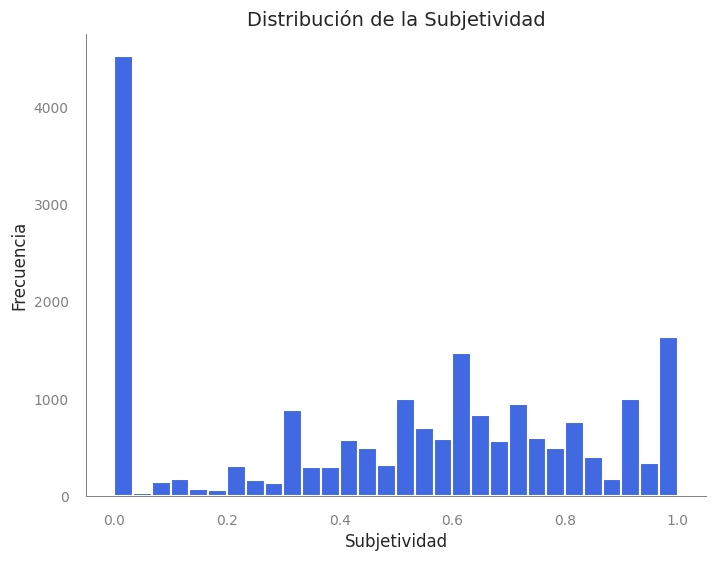

In [18]:
utils.plot_subjectivity_distribution(df)

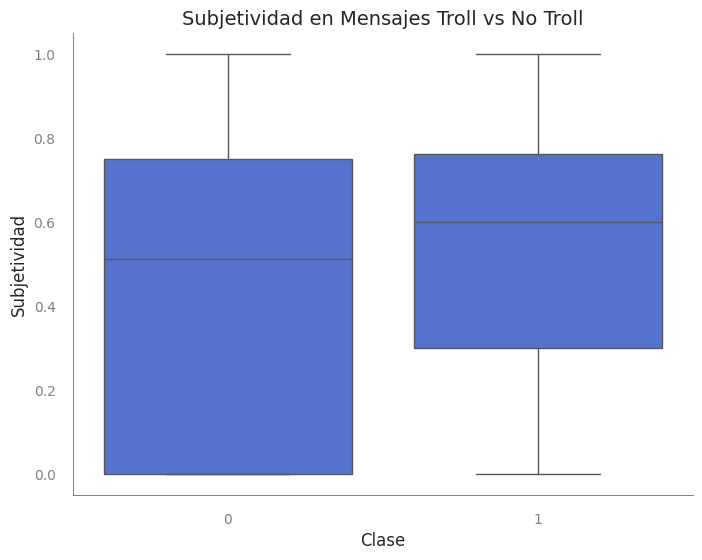

In [19]:
utils.plot_boxplot_by_class(df)

In [20]:
texts = df['content'].tolist()
texts[:5]

[' Get fucking real dude.',
 " She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ...",
 " why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here.",
 ' Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense.',
 " WTF are you talking about Men? No men thats not a menage  that's just gay."]

In [21]:
utils.vocabulary_diversity(texts)

Vocabulario total: 254305, Vocabulario único: 15734, Diversidad de vocabulario: 0.061870588466605064


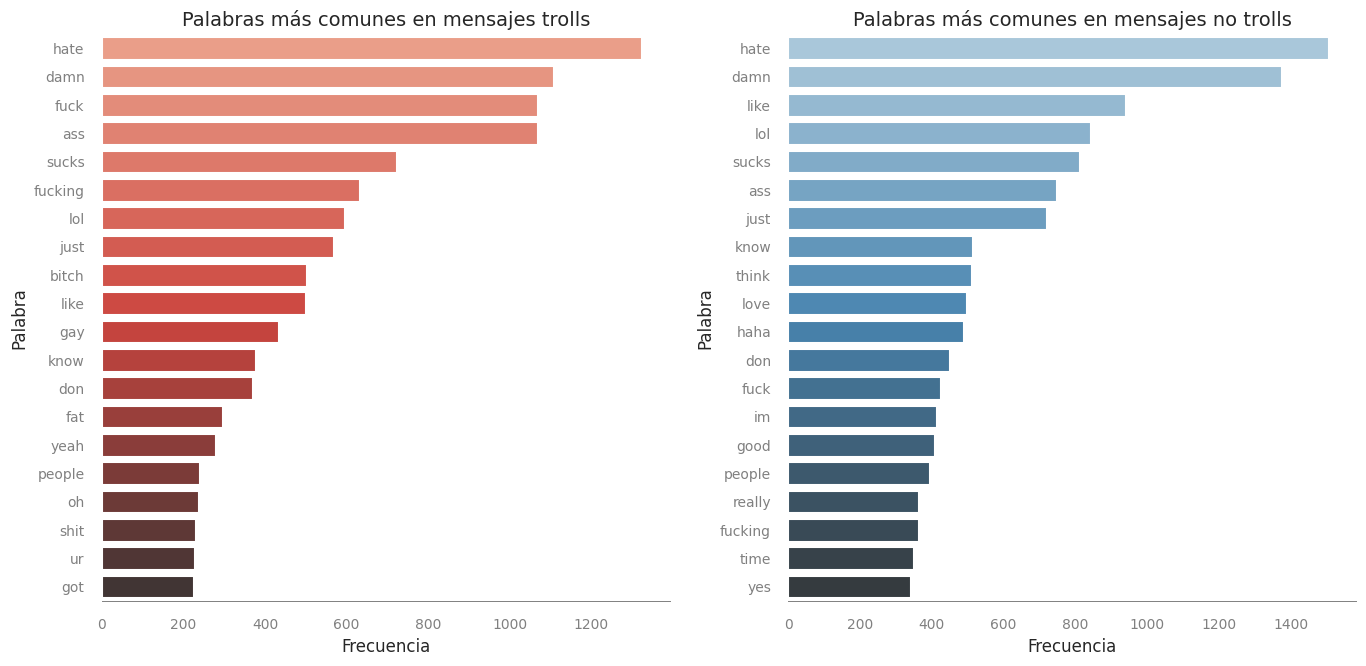

In [22]:
utils.plot_common_words_by_class(df, class_column='label', text_column='content')

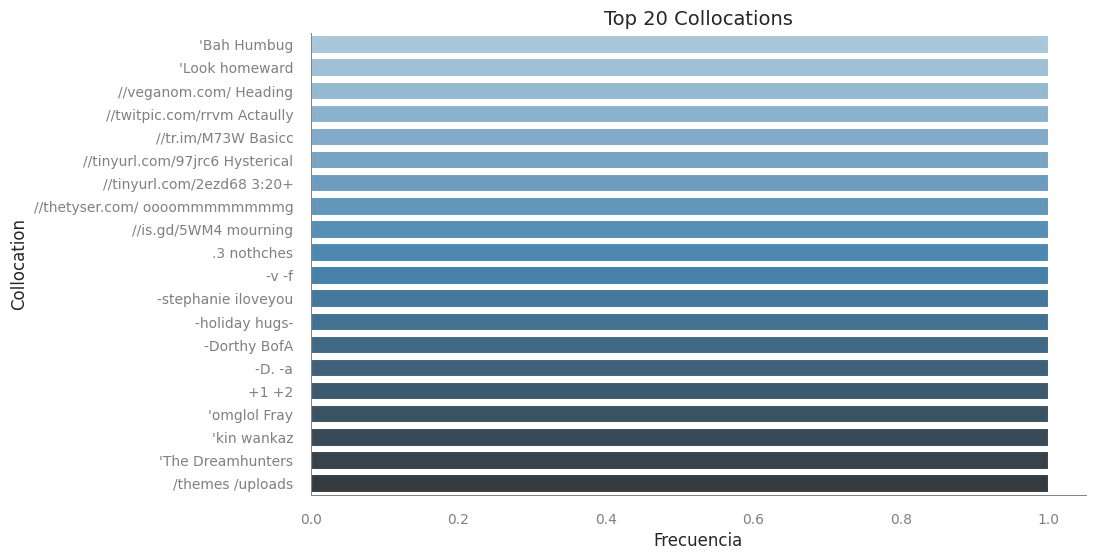

In [23]:
utils.plot_collocations(texts)

# Conclusión del EDA

El análisis detallado del conjunto de datos proporciona una imagen clara de la interacción en la plataforma y revela patrones significativos relacionados con el comportamiento troll:

1. **Comentarios subjetivos y polarizados**: Existe una inclinación hacia expresiones de opiniones fuertes y emociones intensas, creando un ambiente propenso a la presencia de mensajes troll.

2. **Diferencias lingüísticas entre trolls y no trolls**: Los trolls utilizan un lenguaje más ofensivo y agresivo, a menudo recurriendo a términos vulgares y despectivos.

3. **Collocations indicativas**: Las combinaciones frecuentes de palabras ofrecen perspectivas sobre frases que pueden ser características de los mensajes troll y útiles para mejorar la detección.

4. **N-gramas con lenguaje hostil**: Los mensajes de trolls contienen un uso destacado de palabras y frases asociadas a emociones negativas como la ira.

5. **Subjetividad ligeramente superior en trolls**: Los mensajes troll tienden a expresar opiniones más intensas, aunque la correlación con la etiqueta de troll es baja.

6. **Diversidad de vocabulario limitada**: El vocabulario del conjunto de datos es relativamente repetitivo y sencillo, lo cual es típico en contextos informales en línea, especialmente en discusiones emocionales.

7. **Distribución desequilibrada de las clases**: Se observa una necesidad de aplicar técnicas de balanceo para el entrenamiento de modelos predictivos.

8. **Longitud de mensajes mayoritariamente corta**: Indica un estilo comunicativo directo y conciso, común en los mensajes troll.

9. **Polaridad de sentimientos negativos**: Resalta la negatividad predominante en los contenidos asociados a comportamientos troll.

Este análisis refleja la complejidad de identificar mensajes troll y subraya la importancia de un enfoque comprensivo que integre múltiples métricas lingüísticas para una moderación eficaz del contenido en plataformas sociales.